# 第5部　統計的推定

## 3章　母平均の推定

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# グラフの日本語表記
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Meiryo'

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 実装：母集団の用意

In [3]:
# 平均4、標準偏差0.8の正規分布を使いまわす
population = stats.norm(loc=4, scale=0.8)

### 実装：標本平均を計算する

In [4]:
# 標本抽出
np.random.seed(2)
sample = population.rvs(size=10)
sample

array([3.66659372, 3.95498654, 2.29104312, 5.31221665,
       2.56525153, 3.32660211, 4.40230513, 3.00376953,
       3.15363822, 3.27279391])

In [5]:
round(np.mean(sample), 3)

3.495

### 実装：標本平均を何度も計算する

In [6]:
# 平均値を格納する入れ物
sample_mean_array = np.zeros(10000)

In [7]:
# 「データを10個選んで平均値を求める」試行を10000回繰り返す
np.random.seed(1)
for i in range(0, 10000):
    sample_loop = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample_loop)

In [8]:
sample_mean_array

array([3.92228729, 3.86432929, 4.06953003, ..., 4.13616562,
       4.57489661, 4.09896685])

### 実装：標本平均の平均値

In [9]:
# 標本平均の平均値
round(np.mean(sample_mean_array), 3)

4.004

### 実装：標本平均を何度も計算する関数を作る

In [10]:
# 標本平均を何度も計算する関数
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample_loop = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample_loop)
    return sample_mean_array

In [11]:
# 動作確認。
# 「データを10個選んで平均値を求める」試行を10000回繰り返した結果をさらに平均する
np.random.seed(1)
round(np.mean(calc_sample_mean(size=10, n_trial=10000)), 3)

4.004

### 実装：サンプルサイズ別の、標本平均の分布

In [12]:
np.random.seed(1)
# サンプルサイズ10
size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    'sample_mean':size_10,
    'sample_size':np.tile('size 10', 10000)
})
# サンプルサイズ20
size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    'sample_mean':size_20,
    'sample_size':np.tile('size 20', 10000)
})
# サンプルサイズ30
size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    'sample_mean':size_30,
    'sample_size':np.tile('size 30', 10000)
})

# 結合
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df])

# 結果の表示
print(sim_result.head(3))

   sample_mean sample_size
0     3.922287     size 10
1     3.864329     size 10
2     4.069530     size 10


<AxesSubplot:xlabel='sample_size', ylabel='sample_mean'>

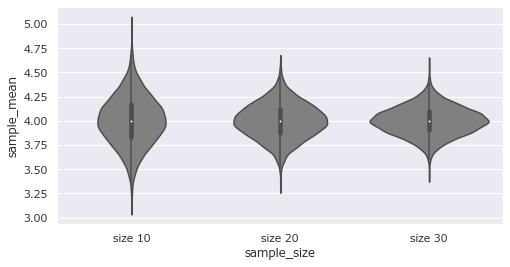

In [13]:
sns.violinplot(x='sample_size', y='sample_mean', 
               data=sim_result, color='gray')

In [14]:
# サンプルサイズ別の、標本平均の標準偏差と平均値
group = sim_result.groupby('sample_size')
print(group.agg([np.std, np.mean], ddof=1).round(3))

            sample_mean       
                    std   mean
sample_size                   
size 10           0.251  4.004
size 20           0.180  4.001
size 30           0.146  4.001


In [15]:
print('標準偏差(size 10)：', round(0.8 / np.sqrt(10), 3))
print('標準偏差(size 20)：', round(0.8 / np.sqrt(20), 3))
print('標準偏差(size 30)：', round(0.8 / np.sqrt(30), 3))

標準偏差(size 10)： 0.253
標準偏差(size 20)： 0.179
標準偏差(size 30)： 0.146


### 実装：サンプルサイズを大きくしたときの標本平均

In [16]:
# サンプルサイズを10～100010までの範囲で100区切りで変化させる
size_array =  np.arange(start=10, stop=100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [17]:
# 「標本平均」を格納する入れ物
sample_mean_array_size = np.zeros(len(size_array))

In [18]:
# 「標本平均を求める」試行を、サンプルサイズを変えながら何度も実行
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_loop = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample_loop)

In [19]:
# データフレームにまとめる
size_mean_df = pd.DataFrame({
    'sample_size': size_array,
    'sample_mean': sample_mean_array_size
})

print(size_mean_df.head(3))

   sample_size  sample_mean
0           10     3.922287
1          110     4.038361
2          210     4.091853


<AxesSubplot:xlabel='sample_size', ylabel='sample_mean'>

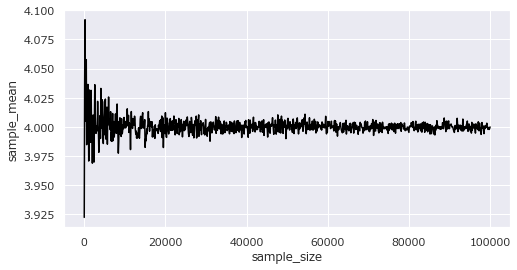

In [20]:
sns.lineplot(x='sample_size', y='sample_mean',
             data=size_mean_df, color='black')